<a href="https://www.kaggle.com/code/silloin23/crop-yield?scriptVersionId=258242844" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
import pickle

In [2]:
import os
print(os.listdir('/kaggle/input/yield-df-csv'))


['yield_df.csv']


In [3]:
df = pd.read_csv('/kaggle/input/yield-df-csv/yield_df.csv')
df


,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [4]:
df.columns


Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [5]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [7]:
def unique_val(df, columns):
    for col in columns:
        if col not in df.columns:
            raise ValueError(f"Column {col} not found in DataFrame")
    return {col: df[col].unique().tolist() for col in columns}

In [8]:
unique_val(df, ['Area', 'Item', 'Year'])


{'Area': ['Albania',
  'Algeria',
  'Angola',
  'Argentina',
  'Armenia',
  'Australia',
  'Austria',
  'Azerbaijan',
  'Bahamas',
  'Bahrain',
  'Bangladesh',
  'Belarus',
  'Belgium',
  'Botswana',
  'Brazil',
  'Bulgaria',
  'Burkina Faso',
  'Burundi',
  'Cameroon',
  'Canada',
  'Central African Republic',
  'Chile',
  'Colombia',
  'Croatia',
  'Denmark',
  'Dominican Republic',
  'Ecuador',
  'Egypt',
  'El Salvador',
  'Eritrea',
  'Estonia',
  'Finland',
  'France',
  'Germany',
  'Ghana',
  'Greece',
  'Guatemala',
  'Guinea',
  'Guyana',
  'Haiti',
  'Honduras',
  'Hungary',
  'India',
  'Indonesia',
  'Iraq',
  'Ireland',
  'Italy',
  'Jamaica',
  'Japan',
  'Kazakhstan',
  'Kenya',
  'Latvia',
  'Lebanon',
  'Lesotho',
  'Libya',
  'Lithuania',
  'Madagascar',
  'Malawi',
  'Malaysia',
  'Mali',
  'Mauritania',
  'Mauritius',
  'Mexico',
  'Montenegro',
  'Morocco',
  'Mozambique',
  'Namibia',
  'Nepal',
  'Netherlands',
  'New Zealand',
  'Nicaragua',
  'Niger',
  'Norwa

In [9]:
df.duplicated().sum()


2310

In [10]:
df.drop_duplicates(inplace=True)


In [11]:
unique_counts = {
    'Area': df['Area'].nunique(),
    'Item': df['Item'].nunique(),
    'Year': df['Year'].nunique()
}


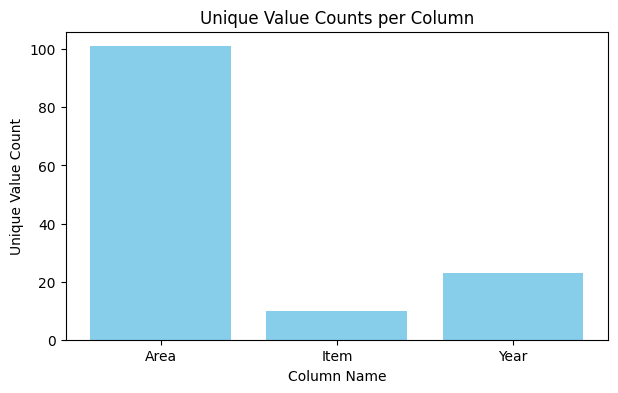

In [12]:
import matplotlib.pyplot as plt

labels = list(unique_counts.keys())
counts = list(unique_counts.values())

plt.figure(figsize=(7,4))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Column Name')
plt.ylabel('Unique Value Count')
plt.title('Unique Value Counts per Column')
plt.show()


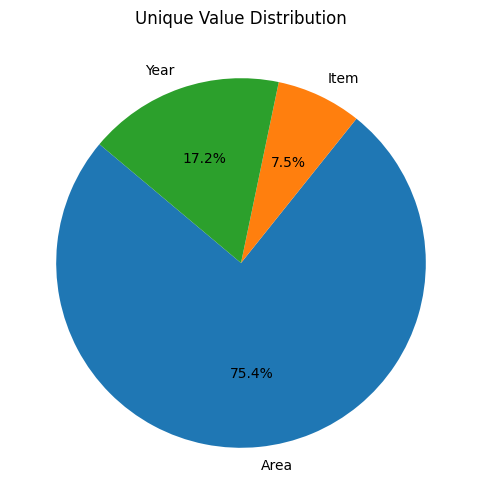

In [13]:
plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Unique Value Distribution')
plt.show()


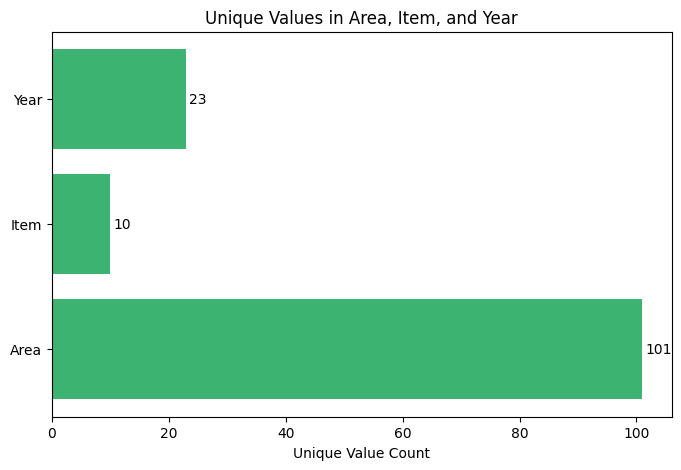

In [14]:
import matplotlib.pyplot as plt

columns = ['Area', 'Item', 'Year']
values = [df[col].nunique() for col in columns]

plt.figure(figsize=(8, 5))
plt.barh(columns, values, color='mediumseagreen')
plt.xlabel('Unique Value Count')
plt.title('Unique Values in Area, Item, and Year')
for i, v in enumerate(values):
    plt.text(v + 0.5, i, str(v), va='center')
plt.show()


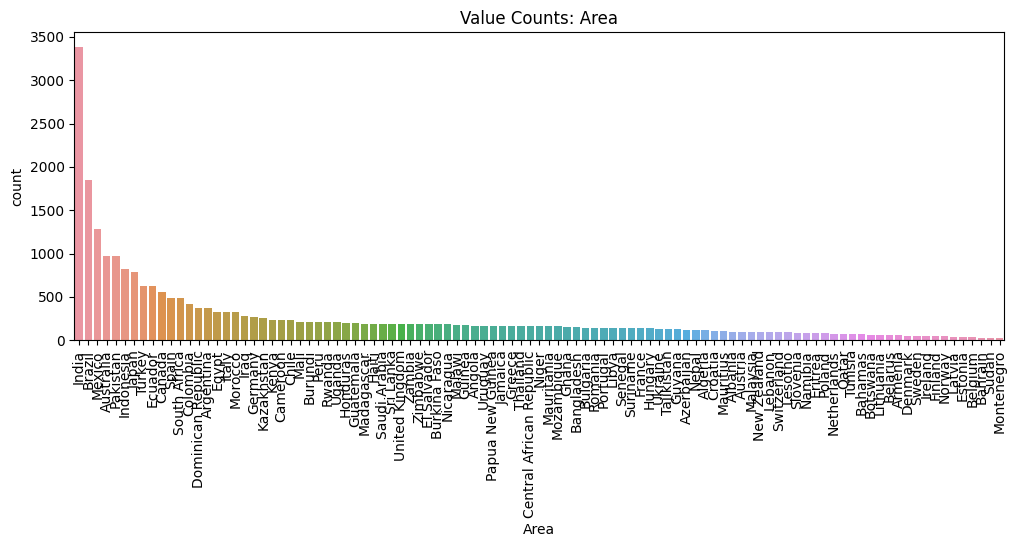

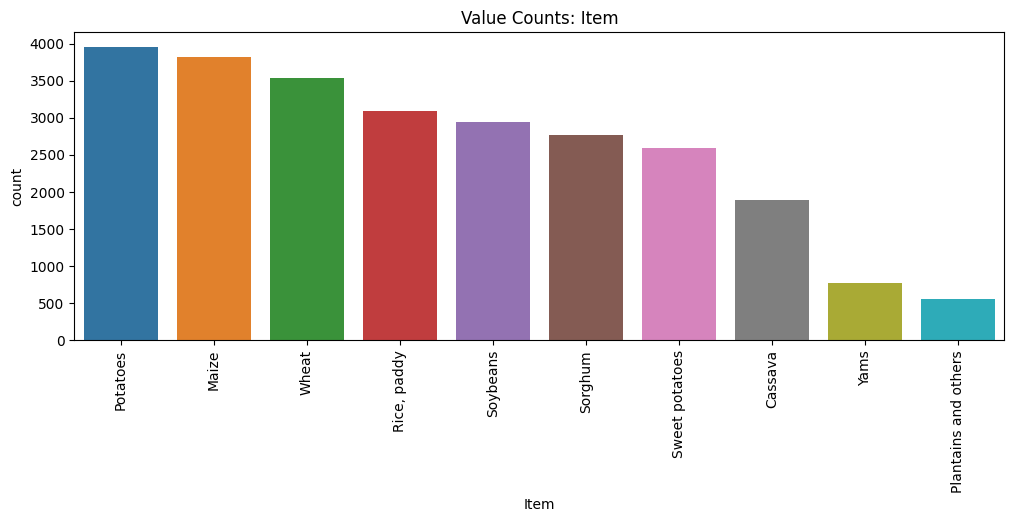

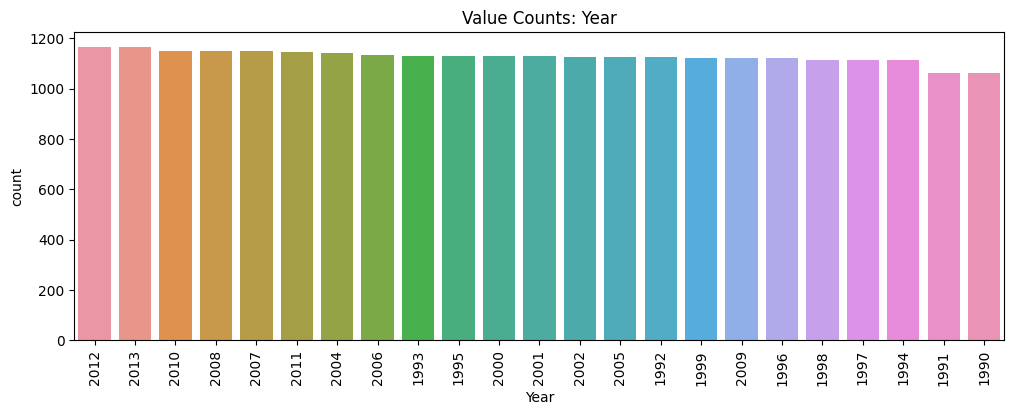

In [15]:
import seaborn as sns

for col in columns:
    plt.figure(figsize=(12, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Value Counts: {col}')
    plt.xticks(rotation=90)
    plt.show()


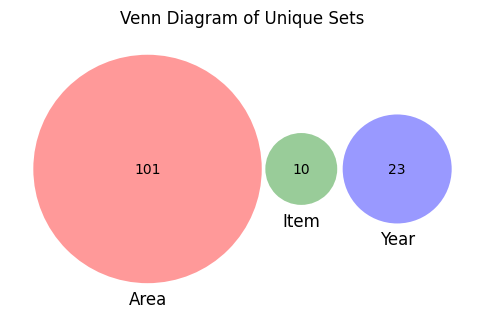

In [16]:
from matplotlib_venn import venn3

set_area = set(df['Area'])
set_item = set(df['Item'])
set_year = set(df['Year'])

plt.figure(figsize=(6,6))
venn3([set_area, set_item, set_year], ('Area', 'Item', 'Year'))
plt.title('Venn Diagram of Unique Sets')
plt.show()


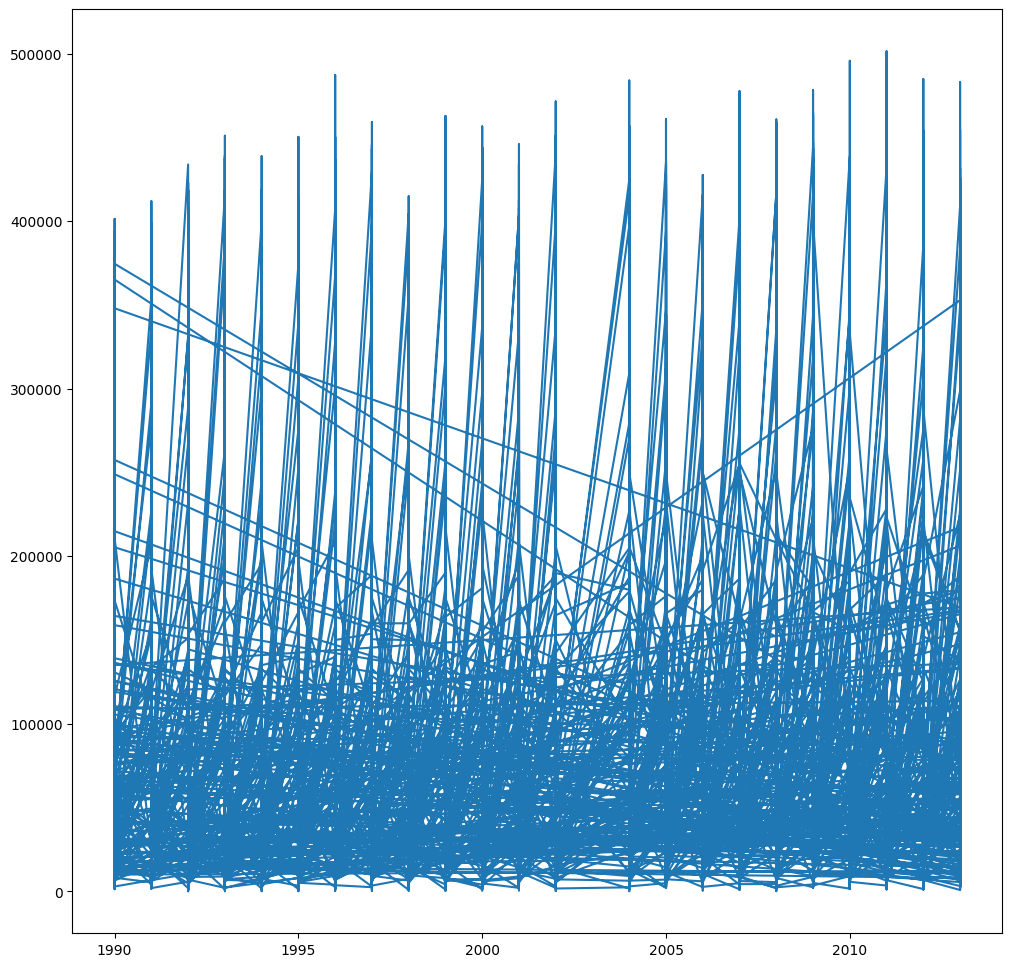

In [17]:
plt.figure(figsize=(12,12))
plt.plot(df['Year'],df['hg/ha_yield'])
plt.show()

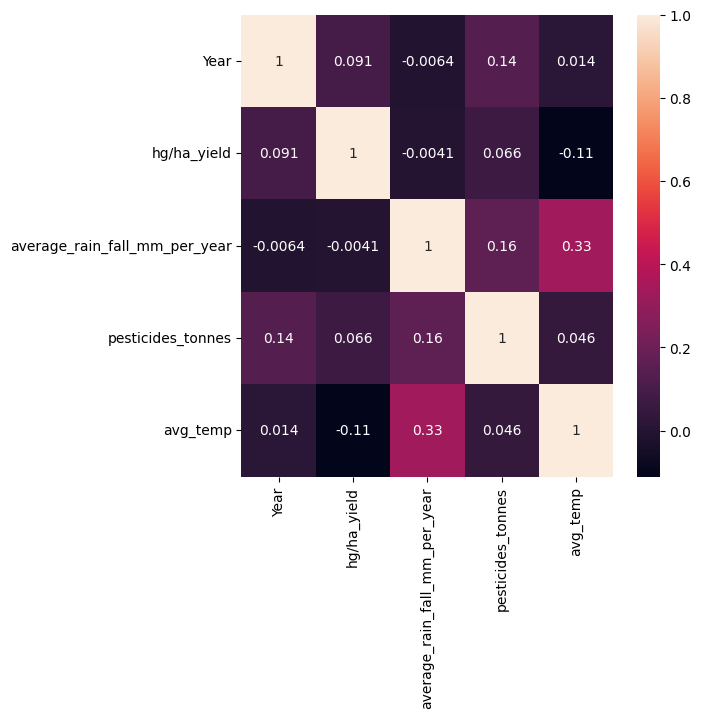

In [18]:
corr_=df[['Year', 'hg/ha_yield','average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_,annot=True)
plt.show()


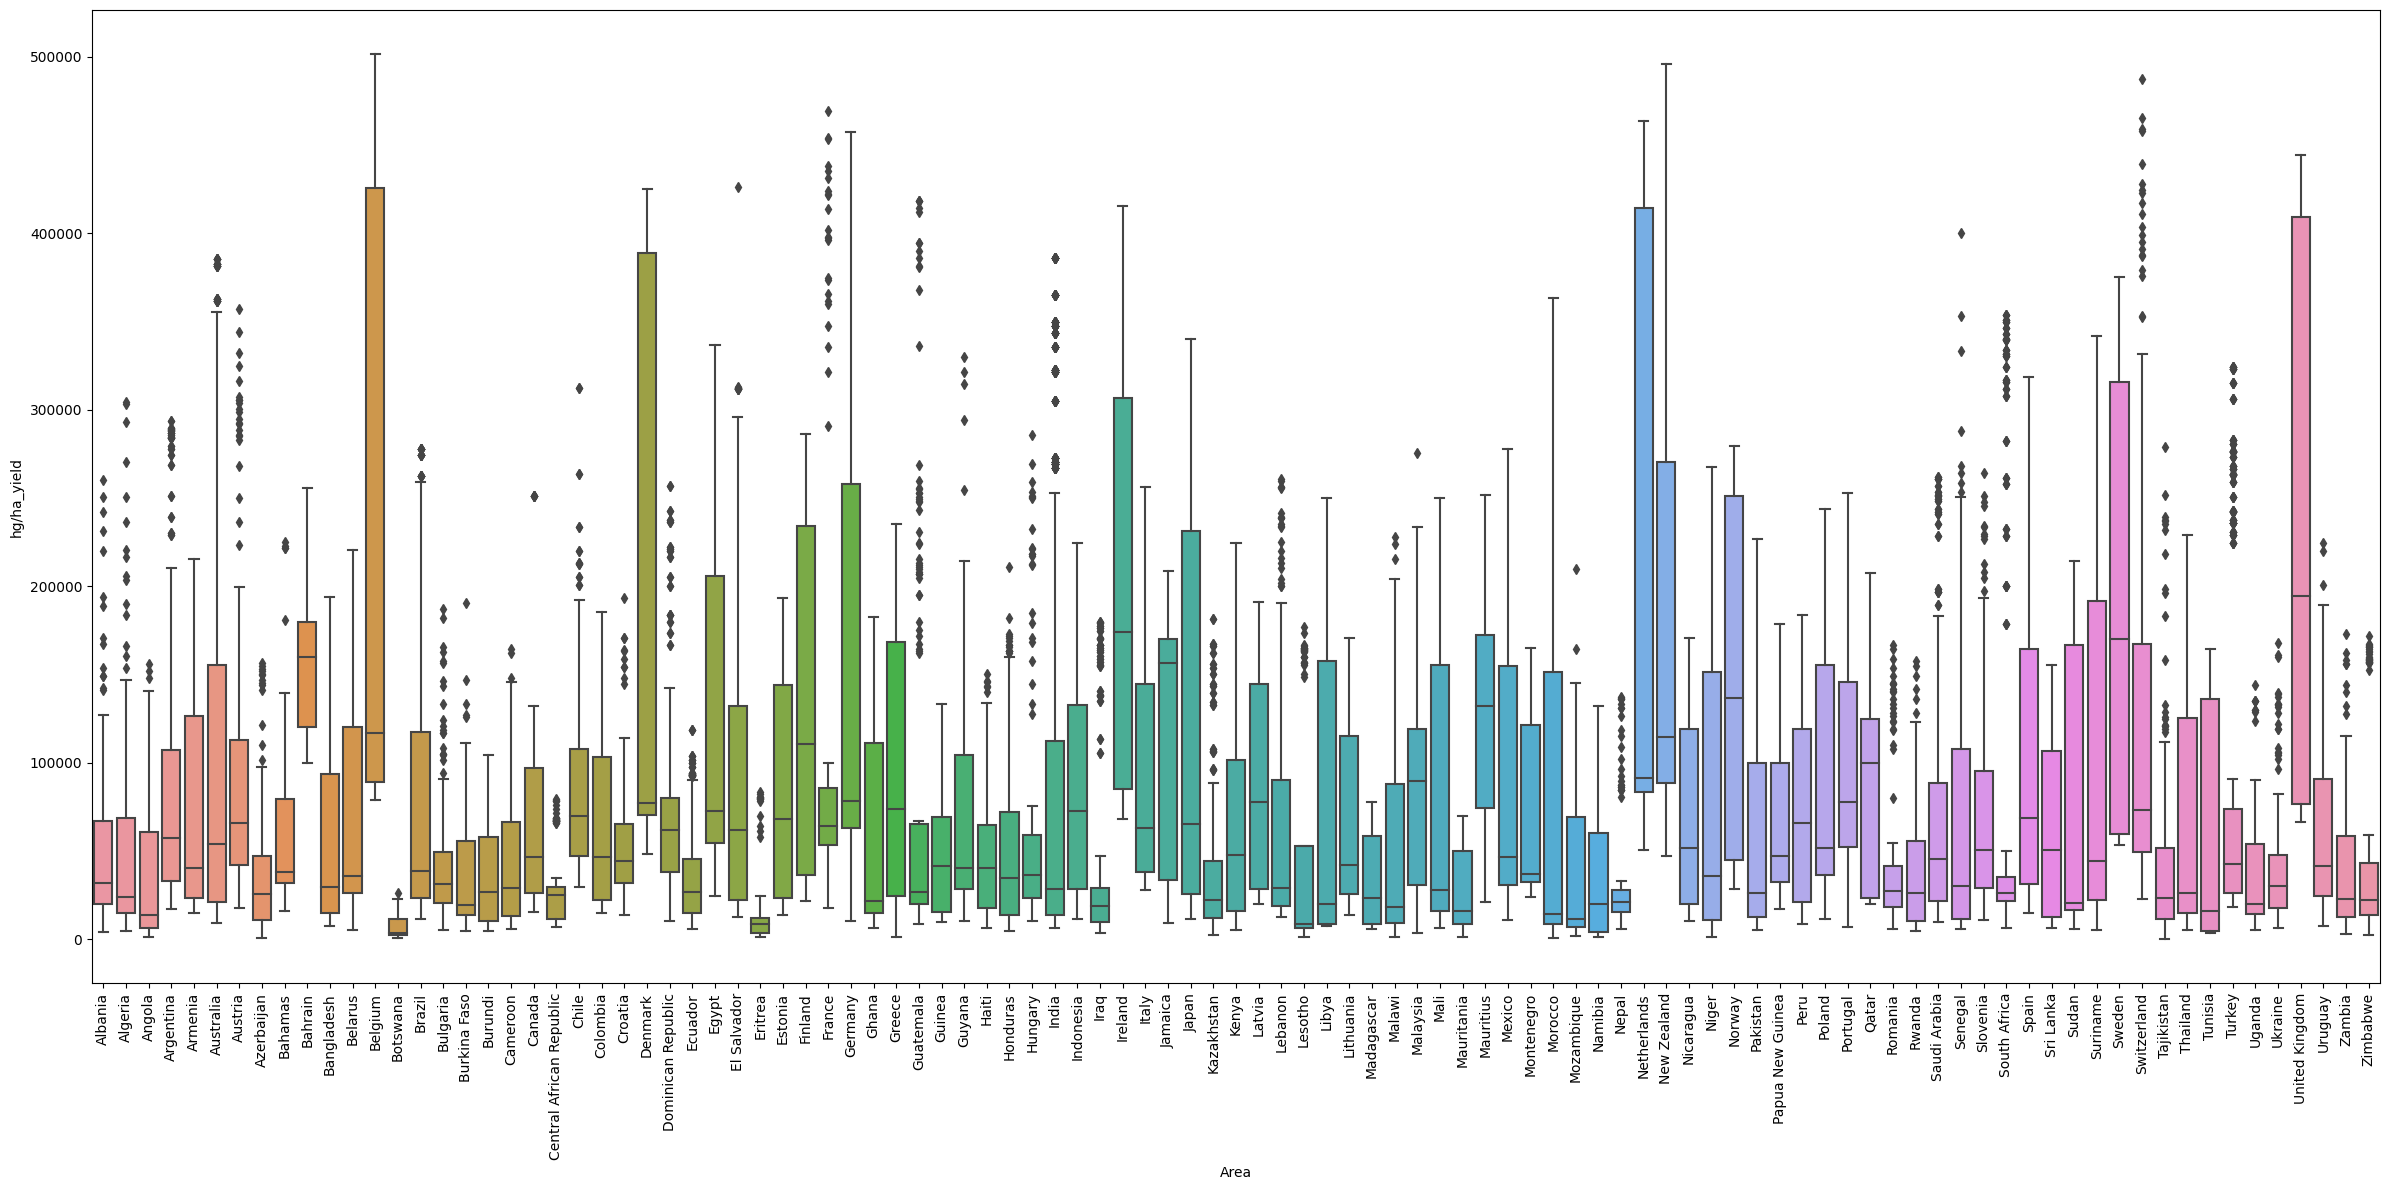

In [19]:
plt.figure(figsize=(24,12))
sns.boxplot(x='Area', y='hg/ha_yield', data=df)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [20]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [21]:
X=df.drop(['hg/ha_yield'],axis=True)
Y=df['hg/ha_yield']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.05,shuffle=True,random_state=42)

In [23]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(24635, 6)
(24635,)
(1297, 6)
(1297,)


In [24]:
encoder=OneHotEncoder(drop='first')
scaleing=StandardScaler()


In [25]:
x_train.head(5)

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
22558,Pakistan,Soybeans,2004,494.0,8903.48,23.78
15122,Indonesia,Sweet potatoes,2006,2702.0,1597.00,27.21
21531,Niger,Maize,1995,151.0,62.00,29.56
23198,Papua New Guinea,Sweet potatoes,1996,3142.0,105.00,25.41
15239,Indonesia,Cassava,2010,2702.0,1597.00,27.55


In [26]:
preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scaleing, [2,3,4,5]),
            ('OHE', encoder, [0, 1]),
        ],
        remainder='passthrough'
)

In [27]:
dummy_x_train=preprocesser.fit_transform(x_train)
dummy_x_test=preprocesser.transform(x_test)

In [28]:
models = {
    'lr': LinearRegression(),
    'lss': Lasso(max_iter=10000),
     'Rid': Ridge(solver="lsqr"),

    'Dtr': DecisionTreeRegressor()
}

for name, md in models.items():
    md.fit(dummy_x_train, y_train)
    y_pred = md.predict(dummy_x_test)
    print(f"{name} : mae : {mean_absolute_error(y_test, y_pred)} score : {r2_score(y_test, y_pred)}")

lr : mae : 28391.649621163047 score : 0.7476785295991122
lss : mae : 28372.37871566903 score : 0.7477341648753417
Rid : mae : 28346.804925799446 score : 0.747834119314616
Dtr : mae : 4013.420971472629 score : 0.9754087570102118


In [29]:
dtr=DecisionTreeRegressor()
dtr.fit(dummy_x_train,y_train)

DecisionTreeRegressor()

In [30]:
pred=dtr.predict(dummy_x_test)

In [31]:
print(r2_score(pred,y_test))

0.9738403941677571


In [32]:
x_train.head(1)

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
22558,Pakistan,Soybeans,2004,494.0,8903.48,23.78


In [33]:
def prediction(Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp):
    feature=np.array([[Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp]])
    trans_feat=preprocesser.transform(feature)
    return (dtr.predict(trans_feat)).reshape(1,-1)

In [34]:
Year = 1990
average_rain_fall_mm_per_year =1485.0
pesticides_tonnes = 121.00
avg_temp = 16.37                   
Area = 'Albania'
Item = 'Maize'
result = prediction(Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [35]:
result

array([[36613.]])